# The Euclidean distance

Euclidean distances are a measure of similarity between two data points. They are calculated by finding the square root of the sum of the squared differences between the corresponding elements of the two data points. Euclidean distances are often used in machine learning and data science to cluster data points together, identify outliers, and find the most similar data points.

We will explore Euclidean distances using your food preferences as an example. We will ask you to rate a variety of foods on a scale of 1 to 10, and then calculate the Euclidean distance between your taste preferences. This will give us a measure of how similar your taste preferences are to those of others.



## 1  Import libraries and files 💾

In [ ]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ID of the Google Sheet for student food preferences
sheet_id = "1cQvzlF8bXEx7tpBlInpYmVaUtCvZuDnBTjhlejtUT_0"

# Title of the Google Sheet
sheet_name = "0"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"


# Create a Pandas DataFrame from the CSV data
foods_df = pd.read_csv(url,
                       index_col="student",
                       nrows=17)

# Drop age - we only care about food here (we'll use age when we learn to scale data)
# Drop favorite_color - why can't we use a color to calculate distances
to_drop = ['age', 'favorite_color']
foods_df = foods_df.drop(columns=to_drop)

---
##2.&nbsp; Explore the data 👩‍🚀

In [ ]:
foods_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Christian,10,5,5,0,8,10,7,5,9
Florian,9,7,2,0,3,5,0,0,5
Hajer,2,4,1,6,5,5,10,0,0
Hans,5,0,0,0,0,7,8,7,0
Ikbel,9,5,4,0,4,7,10,5,0
Imen,5,3,5,0,0,8,10,0,0
Jan,10,10,1,1,1,7,10,10,10
Lawrence,8,8,8,7,8,7,10,10,10
Marina,8,0,9,6,0,10,10,10,3


What kind of foods do you all like the most?

In [ ]:
# Calculate the average score for each column
average_scores = foods_df.mean()

# Sort the columns by their average scores in descending order
sorted_columns = average_scores.sort_values(ascending=False)

# Select the top 3 columns from the sorted DataFrame
top_3_columns = sorted_columns[:3]

# Print the top 3 columns
top_3_columns

olives      8.823529
broccoli    7.941176
peas        7.470588
dtype: float64

Which 3 foods do you all like the least?

In [ ]:
# Select the lowest 3 columns from the sorted DataFrame
lowest_3_columns = sorted_columns[-3:]

# Print the top 3 columns
lowest_3_columns

whisky           4.176471
onion (raw)      3.764706
oysters (raw)    2.352941
dtype: float64

If you want to explore the data further, look for:

- Strong positive or negative correlations between particular foods.
- Foods with a significantly larger or smaller standard deviation than others.
- Students who are consistently high or low scorers.

These differences in the data show that real-world data can be tricky. Large distances can arise due to differences in our data collection and the data itself. One approach to help deal with this problem is scaling, which we'll discuss in the next notebook.



## 3.Calculate the Euclidean distance with Scikit-Learn 📏

Scikit-Learn is a free, open-source machine learning library for Python. It is one of the most popular machine learning libraries in the world, and it is used by data scientists and machine learning engineers of all skill levels. We'll be using it a lot as we learn about machine learning.

In this notebook, we will learn how to use Scikit-Learn to calculate the Euclidean distance between two data points.

In [ ]:
# Calculate the Euclidean distances between all pairs of students in the foods_df DataFrame
distances_array = pairwise_distances(foods_df, metric='euclidean')

# Create a Pandas DataFrame from the distances_array
euclidean_distances_df = pd.DataFrame(distances_array,
                                      index=foods_df.index,
                                      columns=foods_df.index,)

# Display the Euclidean distances DataFrame
euclidean_distances_df  #.astype(int) #

student,Christian,Florian,Hajer,Hans,Ikbel,Imen,Jan,Lawrence,Marina,Martin,Marvin,Sadia,SAM,Sonia,Veronika,Yanish,Lisardo
student,,,,,,,,,,,,,,,,,
Christian,0.000000,12.409674,16.309506,15.297059,10.816654,14.560220,11.618950,10.723805,14.662878,9.219544,10.816654,10.954451,11.135529,11.313708,14.387495,12.649111,7.681146
Florian,12.409674,0.000000,14.966630,14.832397,12.767145,13.564660,15.652476,18.466185,19.313208,17.000000,12.529964,14.491377,13.038405,17.492856,19.570386,13.564660,11.269428
Hajer,16.309506,14.966630,0.000000,12.000000,11.180340,9.797959,18.574176,17.748239,16.583124,17.635192,12.845233,12.727922,11.575837,19.131126,15.264338,12.083046,13.453624
Hans,15.297059,14.832397,12.000000,0.000000,9.000000,9.380832,15.524175,19.052559,12.529964,14.035669,15.394804,9.055385,11.135529,14.560220,15.132746,14.899664,14.866069
Ikbel,10.816654,12.767145,11.180340,9.000000,0.000000,7.937254,13.038405,14.696938,12.083046,13.190906,8.485281,4.582576,5.385165,11.618950,12.165525,11.532563,8.831761
Imen,14.560220,13.564660,9.797959,9.380832,7.937254,0.000000,17.117243,18.894444,13.527749,17.464249,10.344080,11.045361,9.695360,14.071247,16.340135,10.198039,10.816654
Jan,11.618950,15.652476,18.574176,15.524175,13.038405,17.117243,0.000000,11.916375,15.874508,12.328828,14.696938,12.529964,14.662878,11.269428,16.431677,15.652476,10.954451
Lawrence,10.723805,18.466185,17.748239,19.052559,14.696938,18.894444,11.916375,0.000000,13.711309,13.490738,13.190906,13.152946,13.527749,12.041595,11.661904,13.076697,12.489996
Marina,14.662878,19.313208,16.583124,12.529964,12.083046,13.527749,15.874508,13.711309,0.000000,15.620499,14.764823,10.723805,12.688578,8.888194,8.831761,11.000000,15.033296


Whoa, that's a lot of numbers! And we're only dealing with a small sample. Imagine calculating the distances between 5000 songs! It would be impossible to make sense of that matrix. So, to get a feel for what's happening, let's keep things small and look at a heatmap of these numbers. It's a much easier way to understand the data.

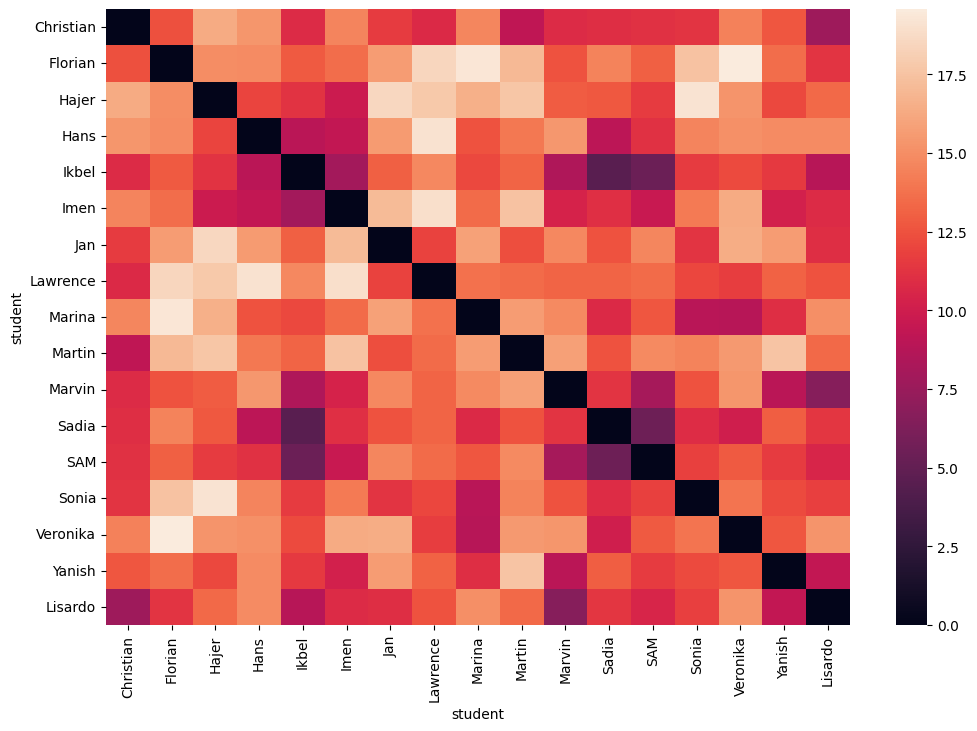

In [ ]:
# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(12, 8))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(euclidean_distances_df);

Using the heatmap, we can quickly identify students with similar and very different food preferences.

- To find the students with the **most similar food preferences**, look for the darkest square on the heatmap that is not on the black square diagonal. This square represents the two students with the smallest Euclidean distance between their food ratings.
 - Review the original food ratings dataframe to see where these students have similar and different tastes.
 - Would you have been able to identify these two students as the most similar simply by looking at the ratings dataframe?

- To find the students with the **most different food preferences**, look for the lightest square on the heatmap. This square represents the two students with the largest Euclidean distance between their food ratings.
 - Review the original food ratings dataframe to see where these students have similar and different tastes.
 - Would you have been able to identify these two students as the most dissimilar simply by looking at the ratings dataframe?

---
## 4.&nbsp; A very brief introduction to clustering
This is a quick start guide to get you experimenting with clustering algorithms and exploring your data. We'll cover the basics, but don't worry – we'll go into more advanced techniques later in a dedicated notebook.

Clustering with scikit-learn is easy! Just import the model, specify your desired number of clusters, and feed your data. That's it! The model will automatically group similar data points together.

Below, we've added an extra step to reveal the cluster label for each data point. This lets you easily identify which cluster each row belongs to, helping you understand the groupings created by the algorithm. For this notebook we've labelled the clusters as `table` - we're working with your food preferences, so this is who you could potential share your lunch with 🍽️.

> **Terminology alert:** The `.fit()` method in scikit-learn is a crucial step in the machine learning process. It's responsible for training a model on a given dataset, allowing it to learn the underlying patterns and relationships within the data. Based on the type of model and the data provided, the `.fit()` method performs the necessary calculations to learn the underlying patterns or relationships within the data. This process varies depending on the specific algorithm the model uses.

In [ ]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialize the model
random_seed = 42
my_kmeans = KMeans(n_clusters = 4, # we'll explore how to choose the number of clusters in a later notebook
                   random_state = random_seed)


In [ ]:
# 3. fit the model to the data
my_kmeans.fit(foods_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

In [ ]:
# 4. obtain the cluster output
table = my_kmeans.labels_
table


array([2, 1, 3, 3, 3, 3, 2, 2, 0, 2, 1, 3, 3, 0, 0, 1, 1], dtype=int32)

In [ ]:
# 5. attach the cluster output to our original DataFrame
foods_df["table"] = table

foods_df.sort_values(by="table")

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,table
student,,,,,,,,,,
Jan,10,10,1,1,1,7,10,10,10,0
Lawrence,8,8,8,7,8,7,10,10,10,0
Martin,10,0,0,0,8,7,10,9,10,0
Hajer,2,4,1,6,5,5,10,0,0,1
Hans,5,0,0,0,0,7,8,7,0,1
Imen,5,3,5,0,0,8,10,0,0,1
Christian,10,5,5,0,8,10,7,5,9,2
SAM,6,6,7,0,6,6,8,6,0,2
Marvin,9,7,9,1,5,4,10,1,4,2


Who's table have you ended up at? Look at the food ratings, why do you think that is?

In [ ]:
foods_df[["table"]].sort_values(by="table")

,table
student,
Jan,0
Lawrence,0
Martin,0
Hajer,1
Hans,1
Imen,1
Christian,2
SAM,2
Marvin,2


## Bonus: Using Model on new data

And how can we use our model further in the future?
We could assign a new person to a table based on their food preferences:


In [ ]:
# 6. get new data in the same format as before

joan_df = pd.DataFrame([[7,3,3,5,3,7,7,5,1]],
                        index=["Joan"],
                        columns = foods_df.columns[:9])
joan_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
Joan,7,3,3,5,3,7,7,5,1


In [ ]:
#7. Use our model to cluster an unseen person
my_kmeans.predict(joan_df)

array([1], dtype=int32)

## Visualizing 3D Clustering

In [ ]:
import plotly.graph_objects as go

#

# Extract the features for plotting
x = foods_df['broccoli']
y = foods_df['brussels_sprouts']
z = foods_df['hamburger (meat)']
student_names = foods_df.index

# Extract the centroids for the selected features
centroid_x = my_kmeans.cluster_centers_[:, foods_df.columns.get_loc('broccoli')]
centroid_y = my_kmeans.cluster_centers_[:, foods_df.columns.get_loc('brussels_sprouts')]
centroid_z = my_kmeans.cluster_centers_[:, foods_df.columns.get_loc('hamburger (meat)')]

# Create a 3D scatter plot for data points
fig = go.Figure()

# Add data points to the plot, with the student names
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    text=student_names,
    mode='markers+text',  # Enable marker and text mode
    marker=dict(
        size=3,
        color=foods_df['table'],  # Color points by the cluster assignment
        colorscale='Viridis',
        opacity=0.8
    ),
    hoverinfo='text',
    name='Data Points'
))

# Add centroids to the plot as large, semi-transparent points
fig.add_trace(go.Scatter3d(
    x=centroid_x, y=centroid_y, z=centroid_z,
    mode='markers',
    marker=dict(
        size=10,
        color=[i for i in range(len(centroid_x))],  # Use a distinct color for each centroid
        colorscale='Viridis',
        opacity=0.9
    ),
    name='Centroids'
))

# Update the layout of the plot
fig.update_layout(
    width=1000,  # Width of the figure in pixels
    height=600,  # Height of the figure in pixels
    title='3D Scatter Plot for KMeans Clusters with Student Names',
    scene=dict(
        xaxis_title='Broccoli',
        yaxis_title='Brussels Sprouts',
        zaxis_title='Hamburger (Meat)'
    ),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show the plot
fig.show()
